In [2]:
import pandas as pd
""" import emoji 
 """
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [3]:
base_color = sns.color_palette()[0]

In [4]:
import pandas as pd
import re

# Specify the file path
file_path = 'output/_chat.txt'

# Define a regular expression pattern to extract timestamp, sender, and message
pattern = re.compile(r'\[(\d{2}/\d{2}/\d{4}, \d{2}:\d{2}:\d{2})\] ([^:]+): (.+)')

# Initialize lists to store extracted information
timestamps = []
senders = []
messages = []

# Read the file line by line and extract information
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        matches = pattern.findall(line)
        if matches:
            timestamp, sender, message = matches[0]
            timestamps.append(pd.to_datetime(timestamp, format='%d/%m/%Y, %H:%M:%S'))
            senders.append(sender)
            messages.append(message)

# Create a DataFrame from the extracted information
df = pd.DataFrame({'timestamp': timestamps, 'sender': senders, 'message': messages})

# Print the resulting DataFrame
print(df)


                timestamp         sender  \
0     2021-08-16 15:07:37        Friends   
1     2021-08-16 15:07:37           Fouz   
2     2022-09-08 13:05:34           Fouz   
3     2022-09-08 13:05:34          Njugz   
4     2022-09-08 13:05:34  Brian Njoroge   
...                   ...            ...   
26637 2024-02-20 14:11:27   Kamau Wa Joe   
26638 2024-02-20 14:17:02         ~ 基普丘巴   
26639 2024-02-20 14:23:15             K1   
26640 2024-02-20 14:27:25         ~ 基普丘巴   
26641 2024-02-20 14:27:56   Kamau Wa Joe   

                                                 message  
0      ‎Messages and calls are end-to-end encrypted. ...  
1              ‎Fouz changed the group name to “Friends”  
2                                        ‎Fouz was added  
3                                       ‎Njugz was added  
4                               ‎Brian Njoroge was added  
...                                                  ...  
26637                                   ‎sticker omitted  

In [5]:
df.shape

(26642, 3)

In [6]:
df['timestamp'].head()

0   2021-08-16 15:07:37
1   2021-08-16 15:07:37
2   2022-09-08 13:05:34
3   2022-09-08 13:05:34
4   2022-09-08 13:05:34
Name: timestamp, dtype: datetime64[ns]

In [ ]:
## UNIVARIATE ANALYSIS

In [7]:
# Check the data type of the 'sender' column
print(df['sender'].dtype)



object


c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19992 (\N{CJK UNIFIED IDEOGRAPH-4E18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24052 (\N{CJK UNIFIED IDEOGRAPH-5DF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


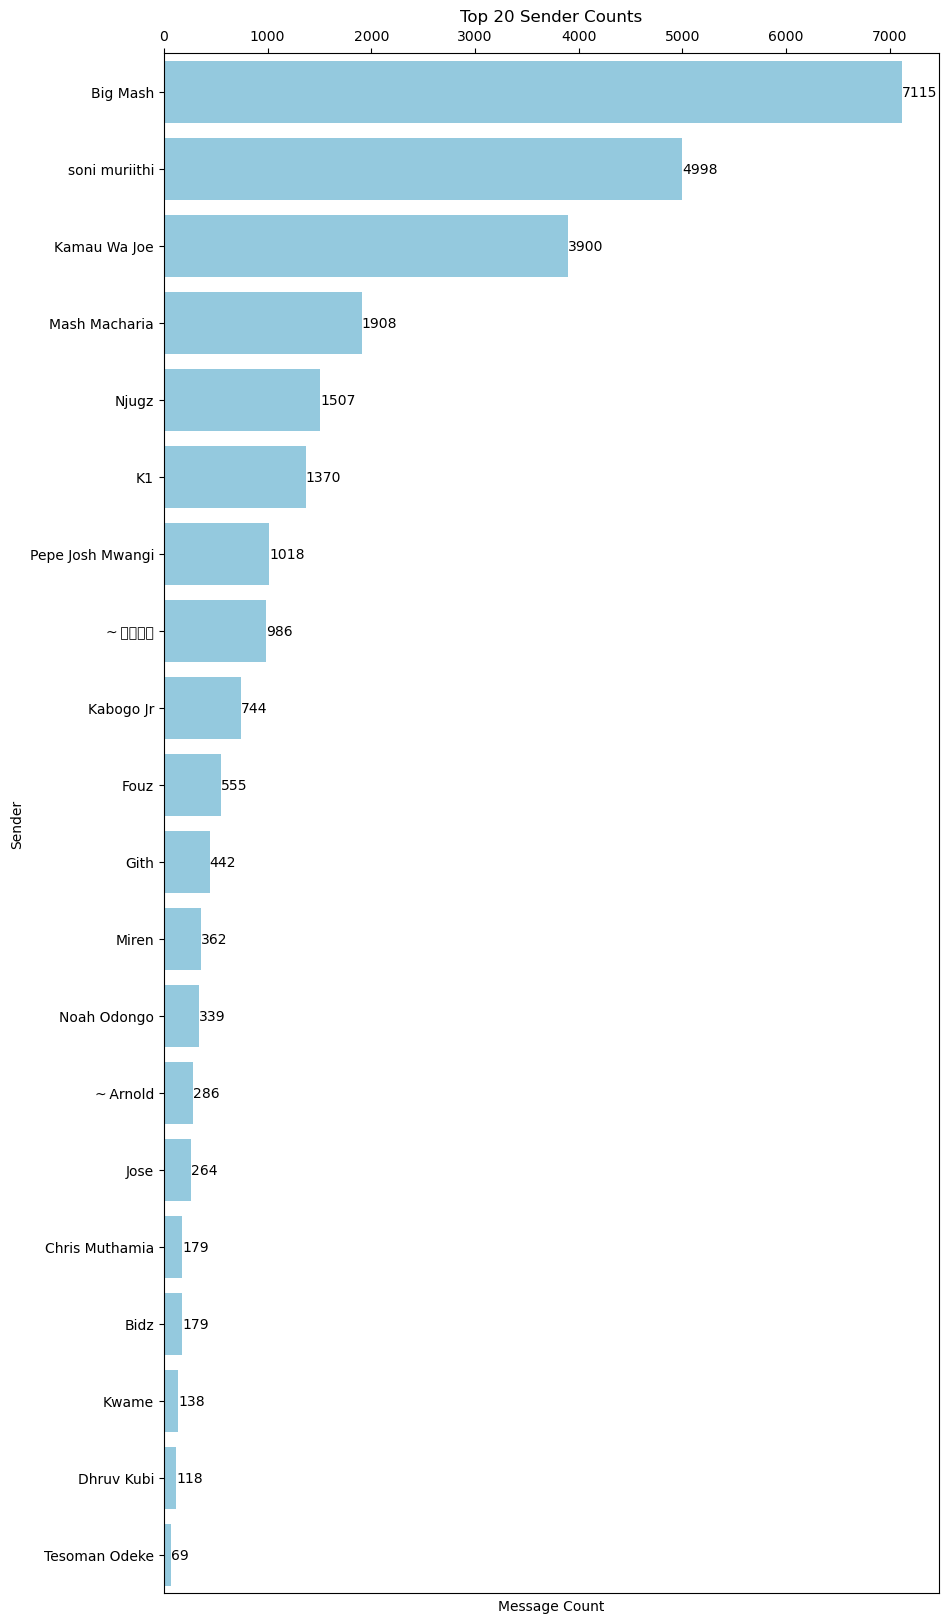

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Remove certain words from the 'sender' column
df['sender'] = df['sender'].str.replace('Rms', '',regex= False)
df['sender'] = df['sender'].str.replace('Wanyama','Wachira',regex= False)
df['sender'] = df['sender'].str.replace('Crispin Royal Media','Chrispine',regex= False)
df['sender'] = df['sender'].str.replace('Sales','',regex= False)
df['sender'] = df['sender'].str.replace('Digital','',regex= False)

# Counting and plotting the first top 20 senders
sender_order = df['sender'].value_counts().index[:20]


plt.figure(figsize=(10, 20))
sns.countplot(data=df, y="sender", order=sender_order, color='skyblue')

# Add data labels to the bars
for index, value in enumerate(df['sender'].value_counts()[sender_order]):
    plt.text(value, index, str(value), ha='left', va='center', color='black')

plt.xticks(rotation=90)
plt.gca().xaxis.set_ticks_position('top')
plt.title('Top 20 Sender Counts')
plt.xlabel('Message Count')
plt.ylabel('Sender')
plt.show()


The above represents The Top 20 users that sent the most messages

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


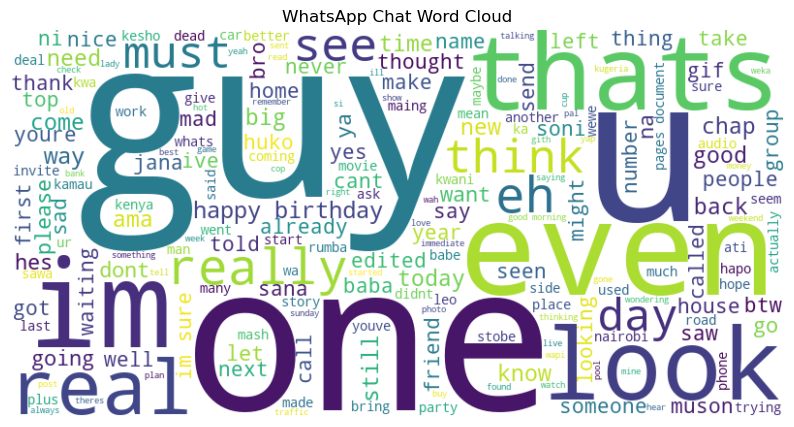

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))

# Predefined stopwords from wordcloud
from wordcloud import STOPWORDS as WC_STOPWORDS

# Combine NLTK and wordcloud stopwords
combined_stopwords = nltk_stopwords.union(WC_STOPWORDS)

# Add any custom stopwords specific to your WhatsApp chat context
custom_stopwords = set(['message was deleted','deleted','message','omitted', 'sticker','video','image','This message was deleted','this','is','that','I','am','are','they','and','to','the','for','in','it','of','a','on','there','as','from','them','he','she','has','had','we','have','with','or','at','if','by','their','you','your','was'])  # Add the words you want to exclude

final_stopwords = combined_stopwords.union(custom_stopwords)

# Assuming 'df' is your DataFrame and it has a column named 'message' with text data
# Preprocess messages: convert to lowercase, remove non-words and numbers
df['processed_message'] = df['message'].str.lower().str.replace("[^a-z\s]", "", regex=True)

# Join all messages into a single text, excluding words in the final_stopwords set
filtered_text = ' '.join([word for text in df['processed_message'] for word in text.split() if word not in final_stopwords])

# Create the word cloud with the updated stopwords list
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', stopwords=final_stopwords).generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WhatsApp Chat Word Cloud')
plt.show()


The above shows the most used words in the chat

c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19992 (\N{CJK UNIFIED IDEOGRAPH-4E18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Eric\anaconda3\envs\notebook_env\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24052 (\N{CJK UNIFIED IDEOGRAPH-5DF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


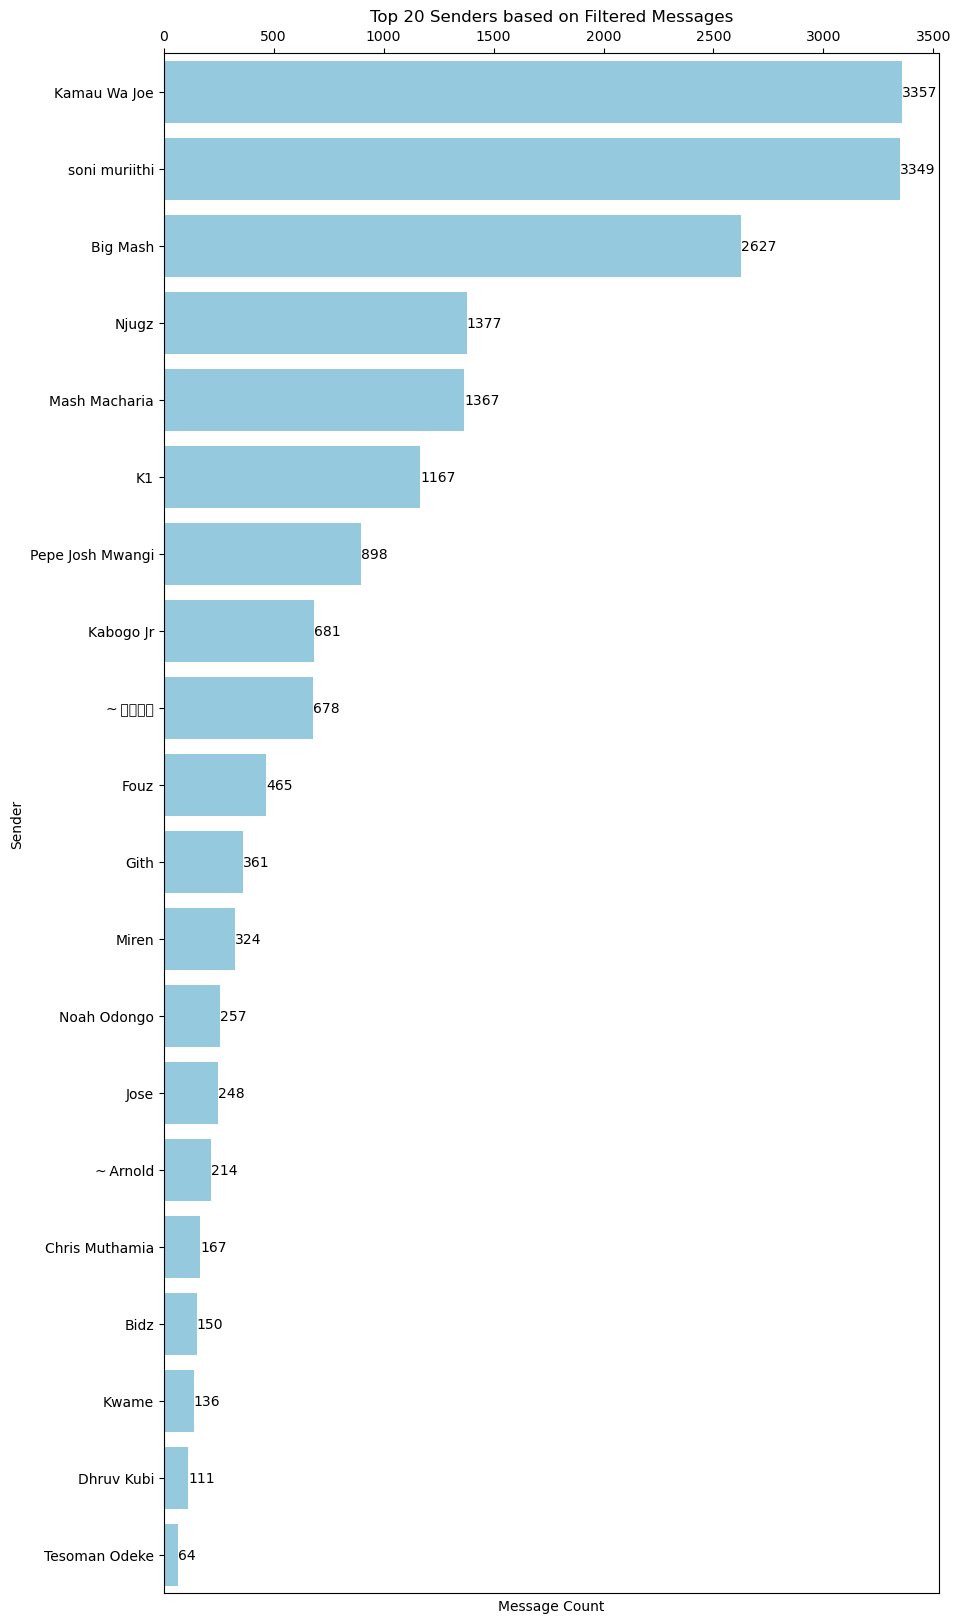

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

# Define the words you want to exclude
exclude_words = set(['video omitted', 'sticker omitted', 'image omitted', 'This message was deleted'])  # Add the words you want to exclude

# Create a mask for messages containing excluded words
exclude_mask = df['message'].str.contains('|'.join(map(re.escape, exclude_words)), case=False)

# Exclude rows containing excluded words from the DataFrame using .loc
df_filtered = df.loc[~exclude_mask].copy()  # Use .copy() to create a copy of the DataFrame

# Get the top 20 senders based on the filtered DataFrame
top_20_senders = df_filtered['sender'].value_counts().index[:20]

df_filtered['sender'] = df_filtered['sender'].str.replace('Rms', '', regex=False)
df_filtered['sender'] = df_filtered['sender'].str.replace('Wanyama', 'Wachira', regex=False)
df_filtered['sender'] = df_filtered['sender'].str.replace('Crispin Royal Media', 'Chrispine', regex=False)
df_filtered['sender'] = df_filtered['sender'].str.replace('Sales', '', regex=False)
df_filtered['sender'] = df_filtered['sender'].str.replace('Digital', '', regex=False)

# Plot the count of messages by the top 20 senders with data labels
plt.figure(figsize=(10, 20))
sns.countplot(data=df_filtered, y="sender", order=top_20_senders, color='skyblue')

# Add data labels to the bars
for index, value in enumerate(df_filtered['sender'].value_counts()[top_20_senders]):
    plt.text(value, index, str(value), ha='left', va='center', color='black')
    
plt.xticks(rotation=90)
plt.gca().xaxis.set_ticks_position('top')
plt.title('Top 20 Senders based on Filtered Messages')
plt.xlabel('Message Count')
plt.ylabel('Sender')
plt.show();


In [12]:
df_filtered.shape

(18158, 3)

In [13]:
#df['Year_Month'] = df['timestamp'].dt.to_period("M")
df['Year'] = df['timestamp'].dt.to_period("Y")
df['Month'] = df['timestamp'].dt.month_name()


df.head()


,timestamp,sender,message,Year,Month
0,2021-08-16 15:07:37,Friends,‎Messages and calls are end-to-end encrypted. ...,2021,August
1,2021-08-16 15:07:37,Fouz,‎Fouz changed the group name to “Friends”,2021,August
2,2022-09-08 13:05:34,Fouz,‎Fouz was added,2022,September
3,2022-09-08 13:05:34,Njugz,‎Njugz was added,2022,September
4,2022-09-08 13:05:34,Brian Njoroge,‎Brian Njoroge was added,2022,September


In [14]:
df['Year'].value_counts()

Year
2023    18864
2022     5663
2024     2113
2021        2
Freq: A-DEC, Name: count, dtype: int64

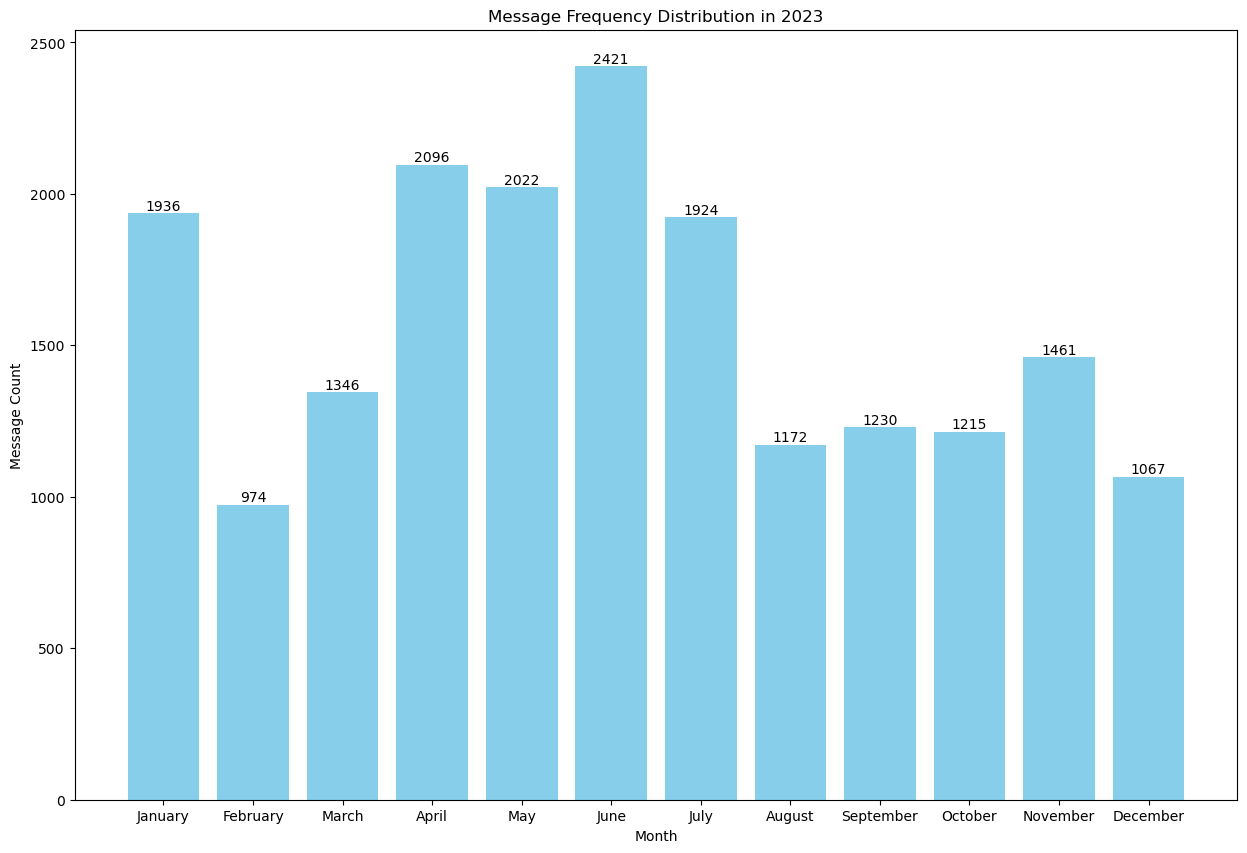

In [15]:

import calendar



# Filter data for the year 2023
df_2023 = df[df['timestamp'].dt.year == 2023].copy()

# Calculate the frequency distribution of messages
message_count_by_month = df_2023['timestamp'].dt.month.value_counts().sort_index()

# Get month names
month_names = [calendar.month_name[i] for i in message_count_by_month.index]

# Plot the distribution with data labels
plt.figure(figsize=(15, 10))
bars = plt.bar(month_names, message_count_by_month, color='skyblue')

# Display data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1),ha='center', va='bottom')

plt.title('Message Frequency Distribution in 2023')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.show()


We can conclude from the above that the most active month in terms of frequency of messages is December 2022

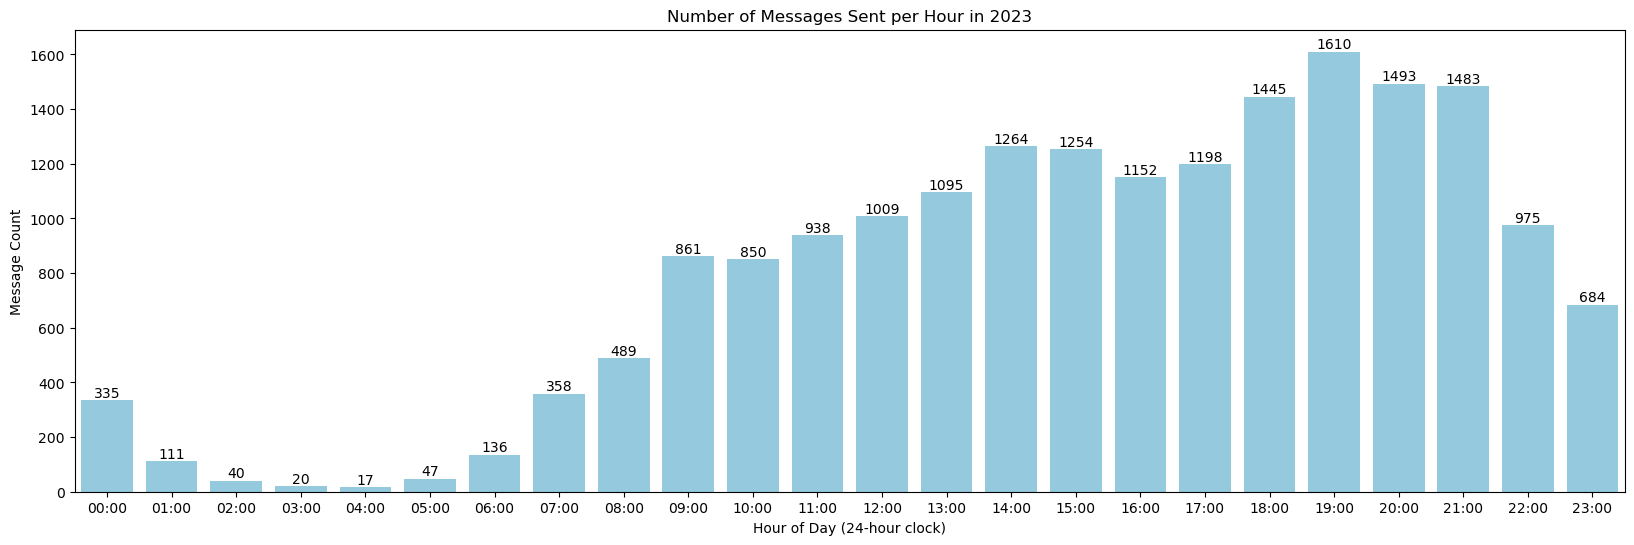

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour from the timestamp
df_2023['hour'] = df_2023['timestamp'].dt.hour

# Calculate the frequency distribution of messages per hour
hourly_message_count = df_2023['hour'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(20, 6))
bars = sns.barplot(x=hourly_message_count.index, y=hourly_message_count.values, color='skyblue')
# Add data labels to the bars
for bar, value in zip(bars.patches, hourly_message_count.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),ha='center', va='bottom')

plt.title('Number of Messages Sent per Hour in 2023')
plt.xlabel('Hour of Day (24-hour clock)')
plt.ylabel('Message Count')
plt.xticks(rotation=0)

# Adjust x-axis ticks to display in 24-hour format
plt.xticks(range(24), [f'{hour:02}:00' for hour in range(24)])

plt.show()


Most people are active at 10.00 am


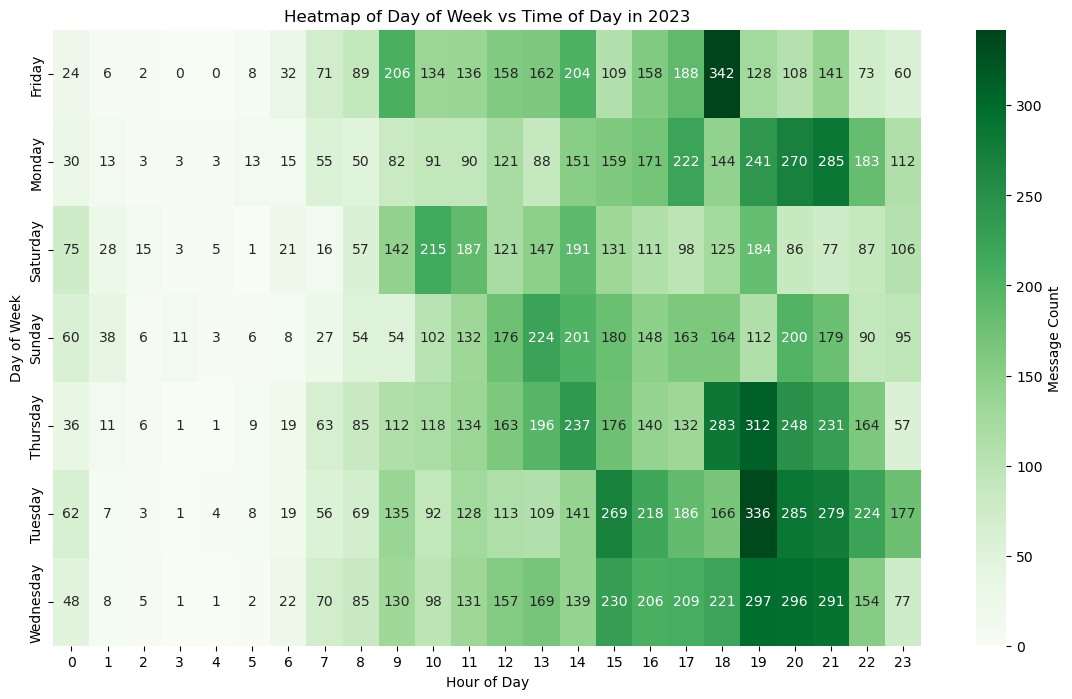

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create new columns for day of week and hour of day
df_2023['day_of_week'] = df_2023['timestamp'].dt.day_name()
df_2023['hour_of_day'] = df_2023['timestamp'].dt.hour

# Create a pivot table for the heatmap with 'hour_of_day' on the horizontal axis
heatmap_data = df_2023.pivot_table(index='day_of_week', columns='hour_of_day', values='message', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Greens', annot=True, fmt='g', cbar_kws={'label': 'Message Count'})
plt.title('Heatmap of Day of Week vs Time of Day in 2023')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


Most people text on thursdays at 11.00 am